# Markov chain-based approach for the music generation

In [15]:
import numpy as np
import pandas as pd
from music21 import note , chord , stream , instrument , converter   
from collections import Counter
np.random.seed(42)

# read file
data = pd.read_csv('data/Liverpool_band_chord_sequence.csv')

In [51]:
data

,chords
0,F
1,Em7
2,A7
3,Dm
4,Dm7
...,...
90,Bb
91,F
92,G7
93,Bb


In [10]:
# Function to convert 
def listToString(s):
   
    # initialize an empty string
    str1 = " "
   
    # return string 
    return (str1.join(s))

# Read another dataset

## Generate bigrams

In [2]:
n = 2
chords = data['chords'].values
ngrams = zip(*[chords[i:] for i in range(n)])
bigrams = [" ".join(ngram) for ngram in ngrams]

bigrams[:5]

['F Em7', 'Em7 A7', 'A7 Dm', 'Dm Dm7', 'Dm7 Bb']

## Predict next state with Markov chain

In [3]:
def predict_next_state(chord:str, data:list=bigrams):
    """Predict next chord based on current state."""
    # create list of bigrams which stats with current chord
    bigrams_with_current_chord = [bigram for bigram in bigrams if bigram.split(' ')[0]==chord]
    # count appearance of each bigram
    count_appearance = dict(Counter(bigrams_with_current_chord))
    # convert apperance into probabilities
    for ngram in count_appearance.keys():
        count_appearance[ngram] = count_appearance[ngram]/len(bigrams_with_current_chord)
    # create list of possible options for the next chord
    options = [key.split(' ')[1] for key in count_appearance.keys()]
    # create  list of probability distribution
    probabilities = list(count_appearance.values())
    # return random prediction
    return np.random.choice(options, p=probabilities)

In [4]:
# example
predict_next_state('F')

'C'

## Generate sequence

In [5]:
def generate_sequence(chord:str=None, data:list=bigrams, length:int=30):
    """Generate sequence of defined length."""
    # create list to store future chords
    chords = []
    for n in range(length):
        # append next chord for the list
        chords.append(predict_next_state(chord, bigrams))
        # use last chord in sequence to predict next chord
        chord = chords[-1]
    return chords

In [65]:
melody = listToString(generate_sequence('F'))

# Play with music21

In [66]:
melody = "tinyNotation: 3/4 " + melody

In [67]:
melody

'tinyNotation: 3/4 A7sus4 A7 Dm Gm6 C7 F A7sus4 A7 Dm Gm6 C7 F C Dm7 G7 Bb F F C Bb C7 F A7sus4 A7 Dm C Bb C7 F Em7'

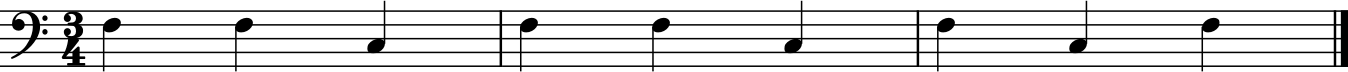

In [68]:
melody = converter.parse(melody)
melody.show()

In [69]:
melody.show('midi')